# Import Libraries

In [2]:
import time
import pandas as pd
import numpy as np
import pickle as pkl
from collections import Counter
import re
import math
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
location_to_save = "data/final_files/"
large_location_to_save = "data/final_files/large_files/"

# Read Files

Default files.

In [28]:
entire_books = pd.read_csv(location_to_save+"items_books_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv(location_to_save+"fairbook_books_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")

Ratings with removed items that don't have metadata.

In [39]:
entire_ratings_filtered = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties_filtered_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings_filtered = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties_filtered_ISBNs.csv", low_memory=False, index_col=0).fillna("")

In [20]:
len(fairbook_ratings_filtered.ISBN.unique()), len(fairbook_books)

(6733, 6733)

In [21]:
len(fairbook_ratings_filtered), len(fairbook_ratings)

(86782, 88552)

Books dataset with correct ISBN (title-author combination).

In [22]:
entire_books_correct_ISBN = pd.read_csv(location_to_save+"items_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")

In [25]:
len(entire_books_correct_ISBN), len(entire_books_correct_ISBN.drop_duplicates("ISBN_alt"))

(271360, 216657)

ISBN dict.

In [26]:
with open('ISBN_dict.pkl', 'rb') as handle:
        large_ISBN_dict = pkl.load(handle)

# Remove duplicate ISBNs.

Fairbook ratings.

In [27]:
for index, row in fairbook_ratings_filtered.iterrows():
    if row.alt_title!="":
        ISBN = row.ISBN
        ISBN_alt = large_ISBN_dict[ISBN]
        fairbook_ratings_filtered.at[index, "ISBN"] = ISBN_alt

In [34]:
fairbook_ratings_filtered_correct = fairbook_ratings_filtered.drop_duplicates(["ISBN", "User-ID"])

Fairbook books.

In [31]:
fairbook_books["ISBN_alt"] = fairbook_books["ISBN"]

In [32]:
for index, row in fairbook_books.iterrows():
    if row.alt_title!="":
        ISBN = row.ISBN
        ISBN_alt = large_ISBN_dict[ISBN]
        fairbook_books.at[index, "ISBN_alt"] = ISBN_alt

Entire ratings.

In [42]:
for index, row in entire_ratings_filtered.iterrows():
    if row.alt_title!="":
        ISBN = row.ISBN
        ISBN_alt = large_ISBN_dict[ISBN]
        entire_ratings_filtered.at[index, "ISBN"] = ISBN_alt

In [38]:
len(entire_books_correct_ISBN.ISBN_alt.unique()), len(entire_ratings_filtered.drop_duplicates(["ISBN", "User-ID"]).ISBN.unique())

(216657, 222496)

In [43]:
entire_ratings_filtered_correct = entire_ratings_filtered.drop_duplicates(["ISBN", "User-ID"])

### Save!!!

In [44]:
fairbook_ratings_filtered_correct.to_csv(location_to_save + 'fairbook_ratings_with_readable_properties_filtered_correct_ISBNs.csv')
entire_ratings_filtered_correct.to_csv(large_location_to_save + 'entire_ratings_with_readable_properties_filtered_correct_ISBNs.csv')

In [47]:
fairbook_books.to_csv(location_to_save+"fairbook_books_with_readable_properties_correct_ISBN.csv")

# Finally make graphs.

Here are the files I will be using!

In [62]:
entire_books = pd.read_csv(location_to_save+"items_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv(location_to_save+"fairbook_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")

Just a small final test

In [63]:
len(fairbook_books.ISBN_alt.unique()), len(fairbook_ratings.ISBN.unique())

(5504, 5504)

In [64]:
len(entire_books.ISBN_alt.unique()), len(entire_ratings.ISBN.unique())

(216657, 222496)

The above makes sense because not all the books are in the ratings!

## Entire ratings

In [65]:
entire_ratings_country = pd.DataFrame(entire_ratings["country"])

In [66]:
entire_ratings_country["country"] = entire_ratings_country["country"].apply(lambda x: "unknown" if x=="" else x)

In [67]:
most_common_5 = [x[0] for x in Counter(entire_ratings_country.country).most_common()[:5]]

In [68]:
most_common_5

['United States of America', 'unknown', 'United Kingdom', 'Canada', 'France']

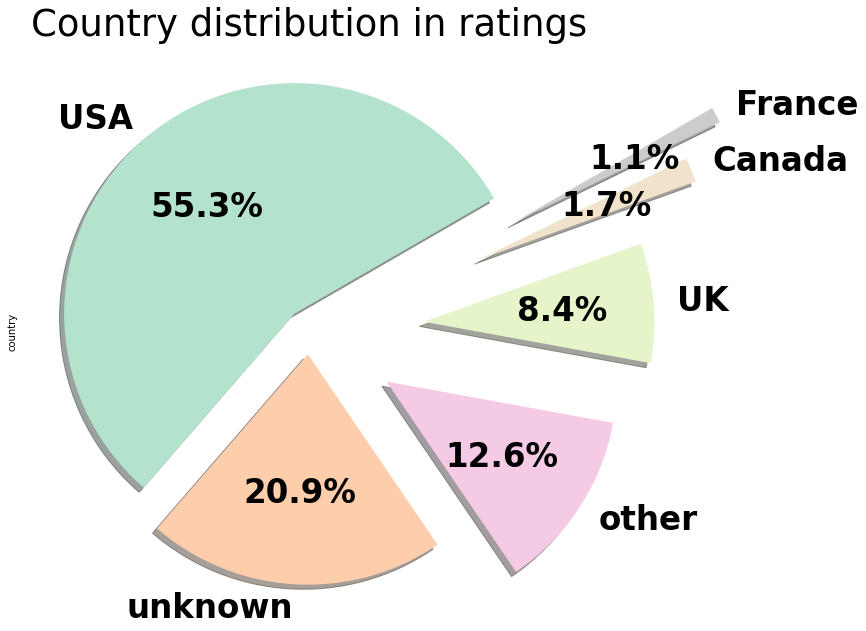

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = entire_ratings_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colormap = "Pastel2")
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in ratings", fontdict={'fontsize': 37})
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

# Entire books

In [70]:
entire_books_country = pd.DataFrame(entire_books.drop_duplicates("ISBN")["country"])
entire_books_country["country"] = entire_books_country["country"].apply(lambda x: "unknown" if x=="" else x)
most_common_5 = [x[0] for x in Counter(entire_books_country.country).most_common()[:5]]

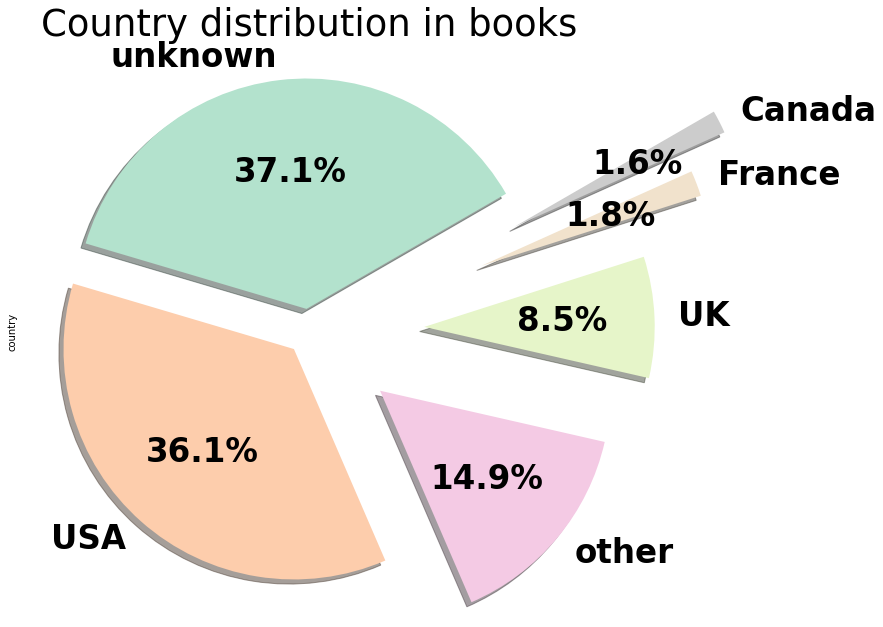

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = entire_books_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colormap = "Pastel2")
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in books", fontdict={'fontsize': 37})
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

## Fairbook ratings

In [72]:
fairbook_ratings_country = pd.DataFrame(fairbook_ratings["country"])

In [73]:
fairbook_ratings_country["country"] = fairbook_ratings_country["country"].apply(lambda x: "unknown" if x=="" else x)

In [74]:
most_common_5 = [x[0] for x in Counter(fairbook_ratings_country.country).most_common()[:5]]

In [75]:
most_common_5

['United States of America',
 'United Kingdom',
 'unknown',
 'Canada',
 'Republic of Ireland']

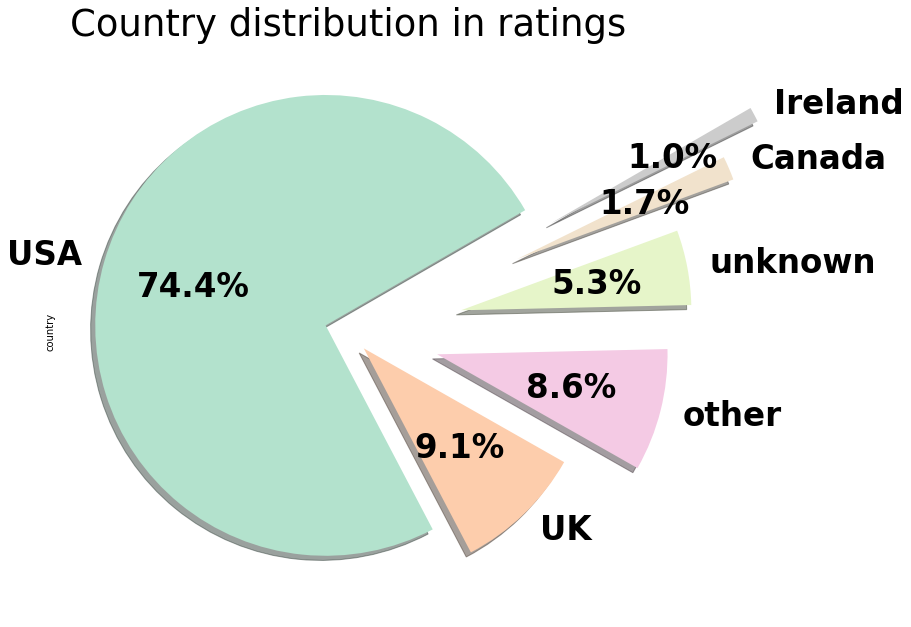

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = fairbook_ratings_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colormap = "Pastel2")
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in ratings", fontdict={'fontsize': 37})
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

# Fairbook books

In [77]:
fairbook_books_country = pd.DataFrame(fairbook_books.drop_duplicates("ISBN_alt")["country"])
fairbook_books_country["country"] = fairbook_books_country["country"].apply(lambda x: "unknown" if x=="" else x)
most_common_5 = [x[0] for x in Counter(fairbook_books_country.country).most_common()[:5]]

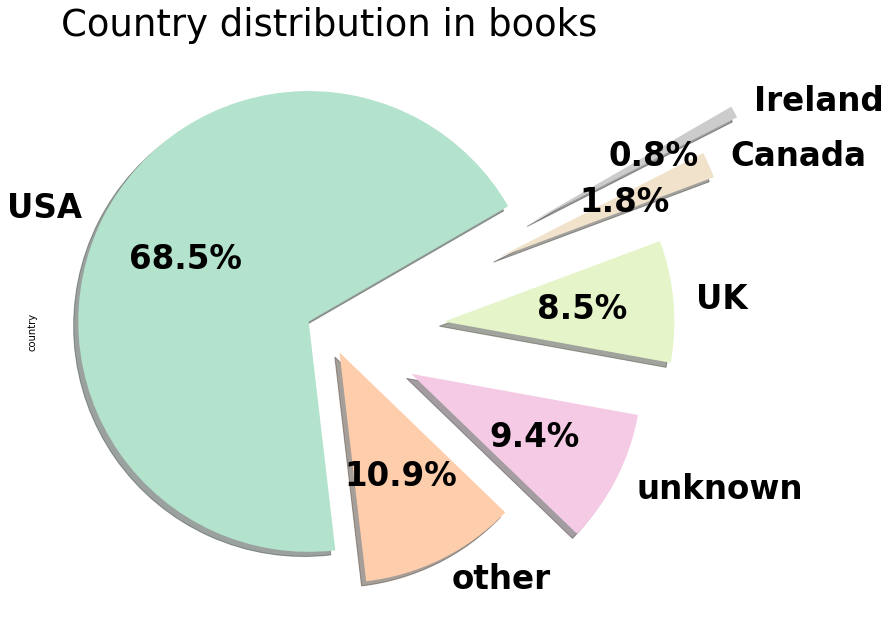

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = fairbook_books_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colormap = "Pastel2")
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in books", fontdict={'fontsize': 37})
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()